In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

my_predictions = {}
r2_predictions = {}
mae_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_eval(name_, pred, actual):
    global r2_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2

    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_r2_model(name_, pred, actual):
    global r2_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2
    
def r2_eval(name_, pred, actual):
    global mae_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_mae_model(name_, pred, actual):
    global mae_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_plot_all():
    global r2_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def mae_plot_all():
    global mae_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

### 계수 시각화 코드

In [175]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

def plot_coef(columns, coef):
    # 데이터 프레임 만드는 코드
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    # 시각화 코드
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

# 1. 데이터를 불러옴 

In [176]:
df = pd.read_csv("data/20212022합침.csv")
# df.head()

C:\Users\hyeok\AppData\Local\Temp\ipykernel_3740\803337188.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/20212022합침.csv")


In [177]:
# df['전월세 구분'].value_counts()    전월세 갯수확인

자치구 종류  
송파구     16437  관악구     14070  강남구     12654  마포구     10294  강서구     10220  동작구      9485  
강동구      9305  광진구      9212  서초구      8640  동대문구     7054  영등포구     6927  노원구      6779  
중랑구      6651  성북구      6537  은평구      6494  구로구      6404  성동구      5751  서대문구     5603  
양천구      5175  금천구      4244  용산구      4006  강북구      3780  도봉구      3434  종로구      2467  
중구       2440

In [178]:
df_sub = df.loc[df['전월세 구분']=='전세']         # 월세건
#songpa = df_sub.loc[df_sub['자치구명']=='송파구']  # 자치구 선택 ! 
songpa_gangsin = df_sub.loc[df_sub['신규갱신여부']=='갱신']  # 갱신 -> 종전 임대료 종전 보증금 있는 데이터만 사용
songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌

C:\Users\hyeok\AppData\Local\Temp\ipykernel_3740\1466455871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌


널값 확인

In [179]:
songpa_gangsin.isnull().sum()

Unnamed: 0        0
접수연도              0
자치구코드             0
자치구명              0
법정동코드             0
법정동명              0
지번구분           6591
지번구분명          6591
본번             6572
부번             6572
층                 0
계약일               0
전월세 구분            0
임대면적(㎡)           0
보증금(만원)           0
임대료(만원)           0
건물명            6569
건축년도            357
건물용도              0
계약기간           2593
신규갱신여부            0
계약갱신권사용여부     24331
종전 보증금            0
종전 임대료        69141
dtype: int64

법정동은 일단 써보자
지번구분, 지번구분명, 본번, 부번, 건물명, 계약일(2022 데이터 사용하니까 일단 빼고 해봄), 전월세 구분, 계약기간, 신규갱신여부, 계약갱신권사용여부, 자치구코드, 자치구명<-본 데이터에서 할땐 넣는게 나을듯>, 법정동코드, 접수연도(일단 여기선빼고 하기)

In [180]:
songpa_train = songpa_gangsin.drop(['지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '전월세 구분', '계약기간', '신규갱신여부', '계약갱신권사용여부', '자치구코드', '자치구명', '법정동코드', '접수연도', '종전 임대료', '임대료(만원)'], axis=1)
songpa_dum = pd.get_dummies(data = songpa_train, columns=['법정동명']) # 법정동 라벨인코딩
# songpa_dum = songpa_dum.loc[songpa_dum['건물용도']!='아파트'] # 아파트 제거 구별로 어떻게 할지 생각 해봐야할듯
songpa_dum = pd.get_dummies(data = songpa_dum, columns=['건물용도']) # 건물용도 라벨인코딩
songpa_dum =songpa_dum.dropna()      #  건축년도 null값 제거
# songpa_dum = songpa_dum.loc[songpa_dum['종전 임대료']>0]  # 전세 할때는 이거 빼야됌


In [181]:
# df_sub['자치구명'].value_counts()
# songpa['신규갱신여부'].value_counts() 신규 갱신 갯수 알아보기용
# songpa_gangsin['부번'].unique() 부번의 종류

층이 없는 건물은 단독다가구 -> 층의 null 값을 1로 변경

In [182]:
# songpa_gangsin.loc[songpa_gangsin['층'].isnull(), '건물용도'].unique() 층이 없는 건물은 다 단독 다가구
# songpa_gangsin['계약갱신권사용여부'].unique()  계약 갱신권은 O 아니면 nan 뿐임

계약갱신권컬럼 사용할거면 사용 한거 1 안한거 0으로 주고 하면 될듯?

In [183]:
# songpa_gangsin['건물용도'].value_counts()  건물수 알아보기 아파트 794 연립다세대 791 오피스텔 300 단독다가구 155

건물명을 쓰지 않기 위해서 아파트를 뺀다..?

In [184]:
# len(songpa_gangsin.loc[songpa_gangsin['건물용도']=='아파트', '건물명'].value_counts())  아파트의 건물명120개더라
# len(songpa_gangsin['건물명'].value_counts())   송파구 전체 건물명은 764개더라 -> 컬럼으로 사용하기 부적절한듯
# len(songpa_gangsin['층'].value_counts())  층의 종류가 몇개 있는지

건축년도가 건물명을 대체해줄수 있지 않을까?

In [185]:
# songpa_gangsin['접수연도'].value_counts()   2022년
# songpa_gangsin.loc[songpa_gangsin['건물명'].isnull(), '건물용도'].unique()  단독 다가구는 건물명이 없다.
# len(songpa_gangsin['법정동명'].unique())
# songpa_dum['종전 임대료'].value_counts()  종전 임대료의 갯수 확인

## (월세)모델에 넣을 데이터 전처리!!

In [186]:
## (전세)모델에 넣을 데이터 전처리!!

In [187]:
# songpa_dum.drop(['종전 보증금', '보증금(만원)'], axis=1, inplace=True)
# songpa_dum

In [188]:
songpa_dum.isnull().sum()

Unnamed: 0    0
층             0
임대면적(㎡)       0
보증금(만원)       0
건축년도          0
             ..
법정동명_흥인동      0
건물용도_단독다가구    0
건물용도_아파트      0
건물용도_연립다세대    0
건물용도_오피스텔     0
Length: 370, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('보증금(만원)', 1), songpa_dum['보증금(만원)'], random_state=0)

C:\Users\hyeok\AppData\Local\Temp\ipykernel_3740\3663802976.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('보증금(만원)', 1), songpa_dum['보증금(만원)'], random_state=0)


## 데이터 정렬 종전 임대료 가격순으로 오름차순 정렬 test 값들만 

In [190]:
# y_train.sort_values(ascending=True, inplace=True)
y_test.sort_values(ascending=True, inplace=True)
x_test = x_test.loc[y_test.index]
# x_train.loc[y_train.index]

### 1. LinearRegression 모델 성능 평가

data_adjust_LinearRegression mse :  385048509073153.7
우리가 임의로 정한 정확도 월세 오차 10이내 :  0.004419632472668062
data_adjust_r2_score :  -491057.7350166408


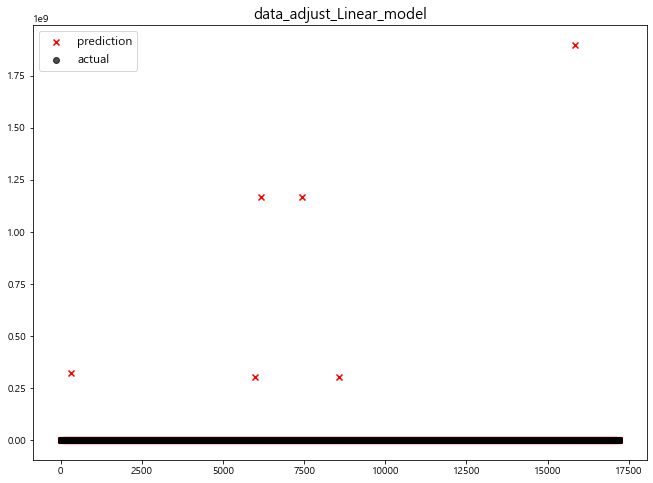

                      model           mse
0  data_adjust_Linear_model  3.850485e+14


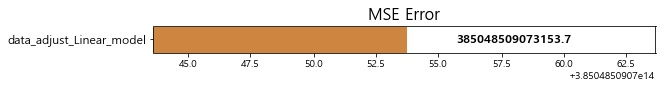

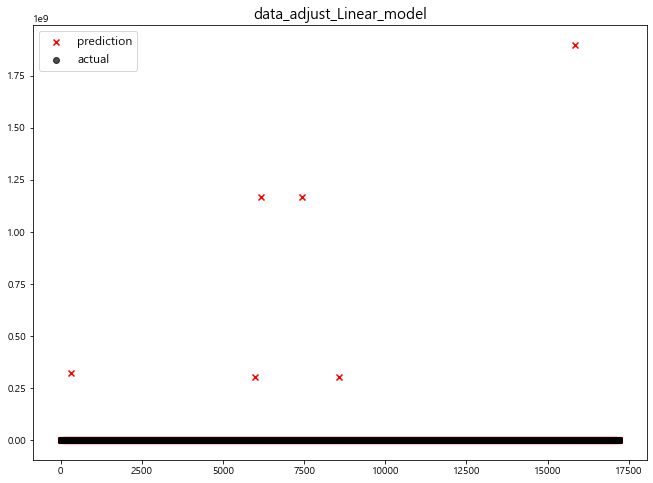

                      model        r2
0  data_adjust_Linear_model -0.000225


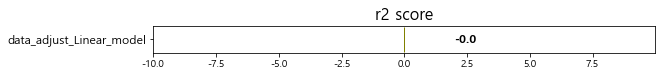

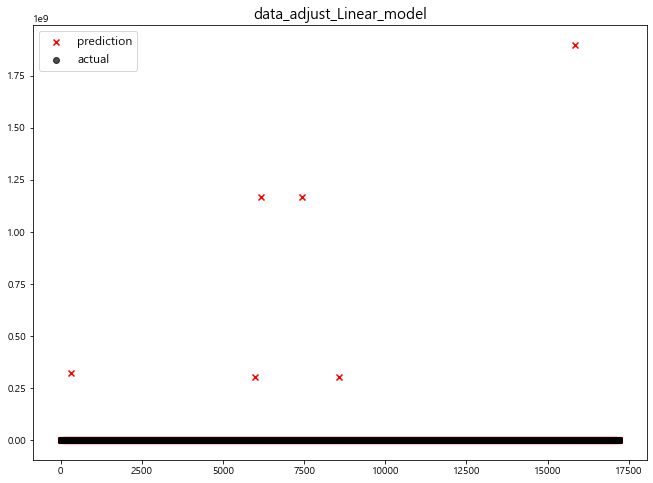

                      model            mae
0  data_adjust_Linear_model  302860.208506


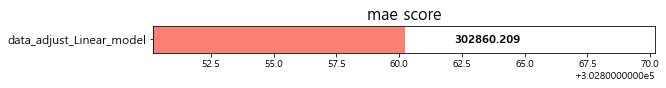

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
print('data_adjust_LinearRegression mse : ',mean_squared_error(y_test, pred))
print('우리가 임의로 정한 정확도 월세 오차 10이내 : ',(abs(y_test - pred)<10).mean())
print('data_adjust_r2_score : ', r2_score(y_test, pred))
add_model('data_adjust_Linear_model', pred, y_test)
plot_all()
add_r2_model('data_adjust_Linear_model', pred, y_test)
r2_plot_all()
add_mae_model('data_adjust_Linear_model', pred, y_test)
mae_plot_all()

In [192]:
# import matplotlib.pyplot as plt
# import numpy as np

In [193]:
# x = np.arange(503)
# plt.figure(figsize=(20, 20))
# plt.plot(x, pred, color='r', label='pred')   # 예측값
# plt.scatter(x, y_test, label='data')   # 실제값
# plt.legend(fontsize=18)
# plt.show()

### 2. DecisionTreeRegressor 모델 성능 평가

LinearRegression mse :  27842744.518827535
우리가 임의로 정한 tree 정확도 월세 오차 10이내 :  0.0018027448243777622
tree_r2_score :  0.9644916872013926


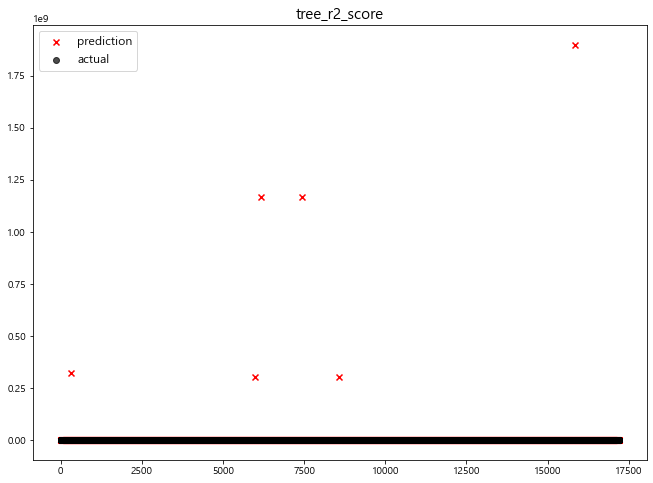

                      model           mse
0  data_adjust_Linear_model  3.850485e+14
1                  tree_mse  3.850485e+14


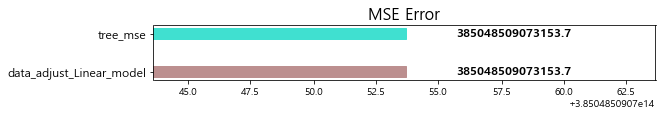

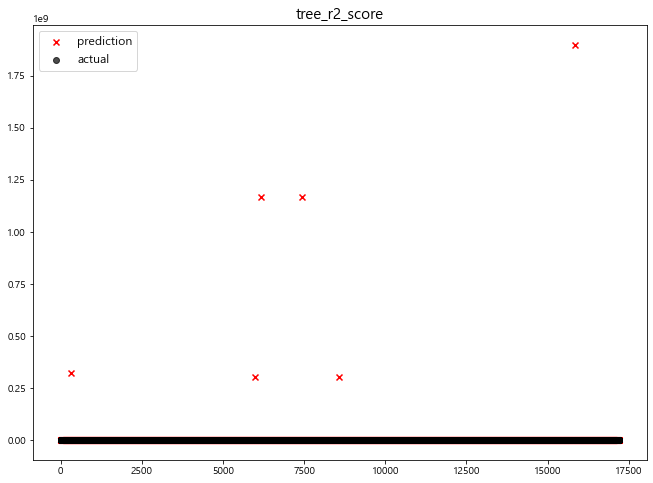

                      model        r2
0  data_adjust_Linear_model -0.000225
1             tree_r2_score -0.000225


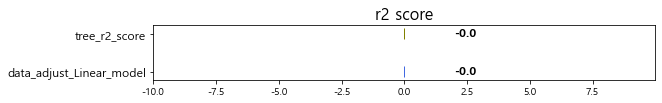

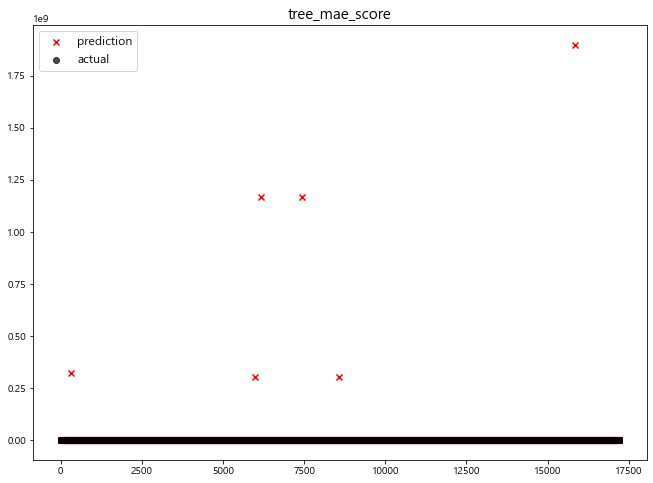

                      model            mae
0  data_adjust_Linear_model  302860.208506
1            tree_mae_score  302860.208506


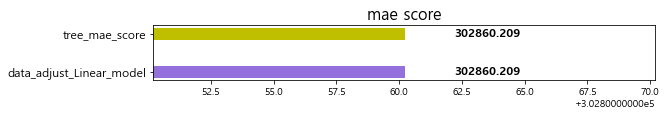

In [194]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor(max_depth=5, random_state=0, min_samples_split=10).fit(x_train, y_train)
tree_pred = treemodel.predict(x_test)
print('LinearRegression mse : ',mean_squared_error(y_test, tree_pred))
print('우리가 임의로 정한 tree 정확도 월세 오차 10이내 : ',(abs(y_test - tree_pred)<10).mean())
print('tree_r2_score : ', r2_score(y_test, tree_pred))
add_model('tree_mse', pred, y_test)
add_r2_model('tree_r2_score', pred, y_test)
plot_all()
r2_plot_all()
add_mae_model('tree_mae_score', pred, y_test)
mae_plot_all()

### 샘플 데이터 하나씩 뽑아보면서 확인해보기

In [195]:
# sampledata_y=y_test.iloc[[10],]
# print('임의로 뽑은 정답 데이터', sampledata_y)
# sampledata_x=x_test.iloc[[10],]
# sampledata_x[['종전 임대료', '종전 보증금', '보증금(만원)']]
# print('모델의 예측 결과 : ', model.predict(sampledata_x))

### 3. 라소 모델 돌리면서 지표들 시각화하기!

c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.120e+11, tolerance: 4.173e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.351e+11, tolerance: 4.173e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+11, toleranc

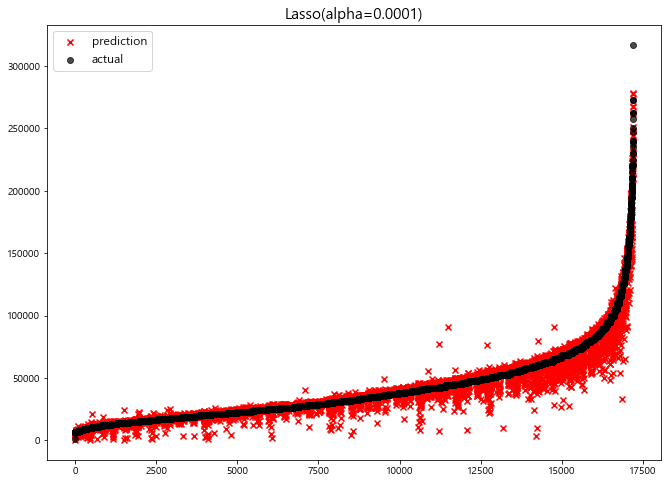

                      model           mse
0  data_adjust_Linear_model  3.850485e+14
1                  tree_mse  3.850485e+14
2          Lasso(alpha=100)  2.554250e+07
3           Lasso(alpha=10)  2.546842e+07
4       Lasso(alpha=0.0001)  2.533668e+07
5        Lasso(alpha=0.001)  2.533645e+07
6         Lasso(alpha=0.01)  2.533333e+07
7            Lasso(alpha=1)  2.532430e+07
8          Lasso(alpha=0.1)  2.531160e+07


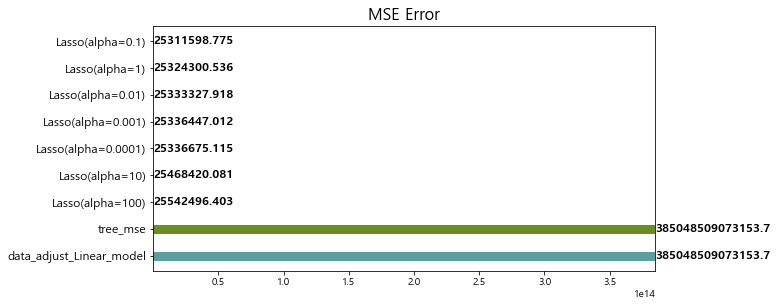

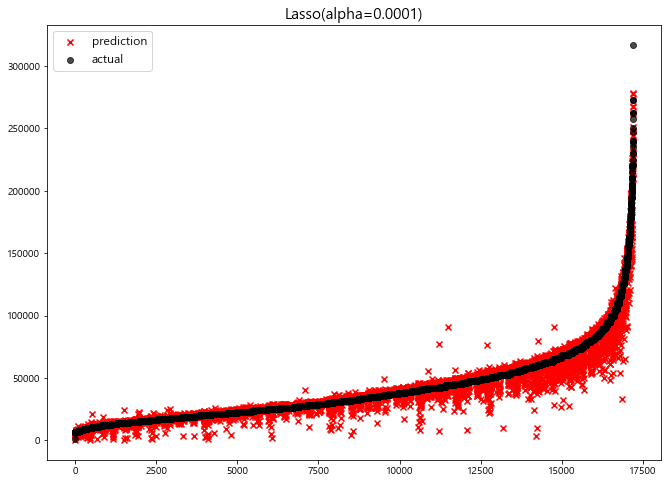

                      model        r2
0          Lasso(alpha=0.1)  0.966835
1         Lasso(alpha=0.01)  0.966812
2        Lasso(alpha=0.001)  0.966809
3       Lasso(alpha=0.0001)  0.966808
4            Lasso(alpha=1)  0.966796
5           Lasso(alpha=10)  0.966576
6          Lasso(alpha=100)  0.966474
7  data_adjust_Linear_model -0.000225
8             tree_r2_score -0.000225


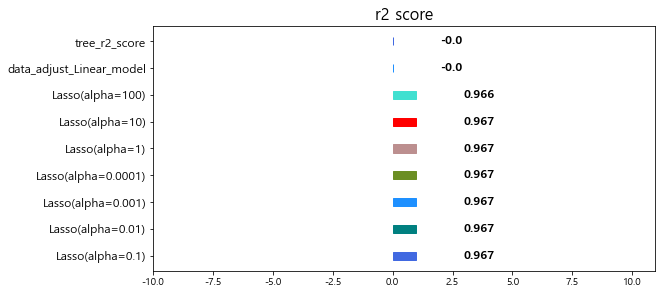

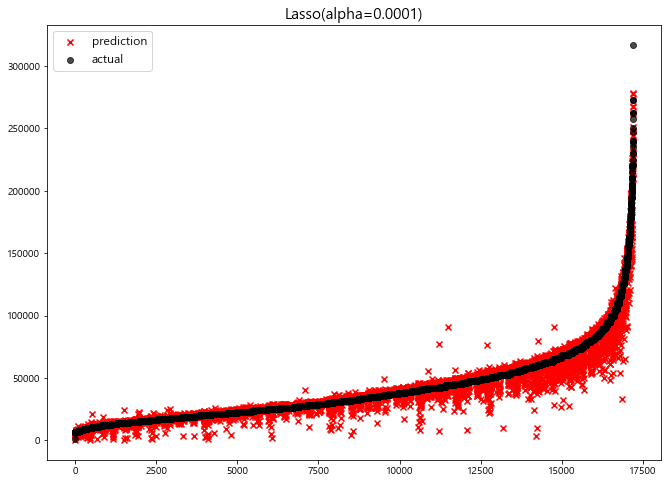

                      model            mae
0  data_adjust_Linear_model  302860.208506
1            tree_mae_score  302860.208506
2       Lasso(alpha=0.0001)    2362.690599
3        Lasso(alpha=0.001)    2362.614543
4         Lasso(alpha=0.01)    2361.818824
5          Lasso(alpha=0.1)    2356.298590
6            Lasso(alpha=1)    2340.818828
7          Lasso(alpha=100)    2340.731010
8           Lasso(alpha=10)    2333.227053


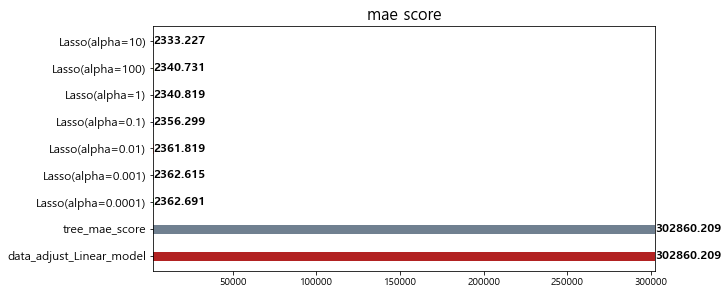

In [196]:
from sklearn.linear_model import Lasso
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
#alphas = [0.1]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 4. Ridge 모델 확인 및 시각화

c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.7608e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.76109e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.76102e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\hyeok\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.76111e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


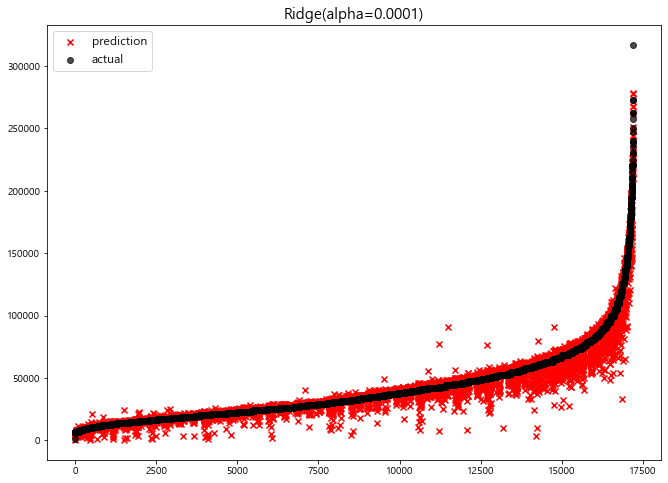

                       model           mse
0   data_adjust_Linear_model  3.850485e+14
1                   tree_mse  3.850485e+14
2           Lasso(alpha=100)  2.554250e+07
3            Lasso(alpha=10)  2.546842e+07
4        Ridge(alpha=0.0001)  2.533678e+07
5         Ridge(alpha=0.001)  2.533674e+07
6        Lasso(alpha=0.0001)  2.533668e+07
7         Lasso(alpha=0.001)  2.533645e+07
8          Ridge(alpha=0.01)  2.533635e+07
9          Lasso(alpha=0.01)  2.533333e+07
10          Ridge(alpha=0.1)  2.533287e+07
11            Lasso(alpha=1)  2.532430e+07
12          Ridge(alpha=100)  2.532270e+07
13            Ridge(alpha=1)  2.531989e+07
14           Ridge(alpha=10)  2.531512e+07
15          Lasso(alpha=0.1)  2.531160e+07


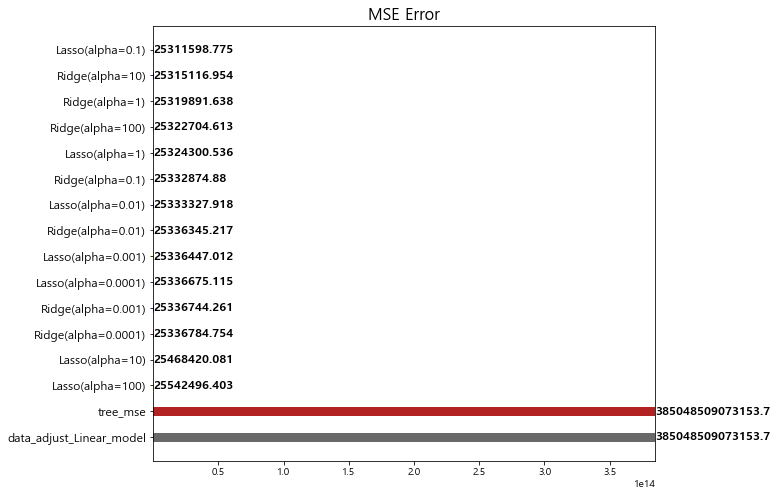

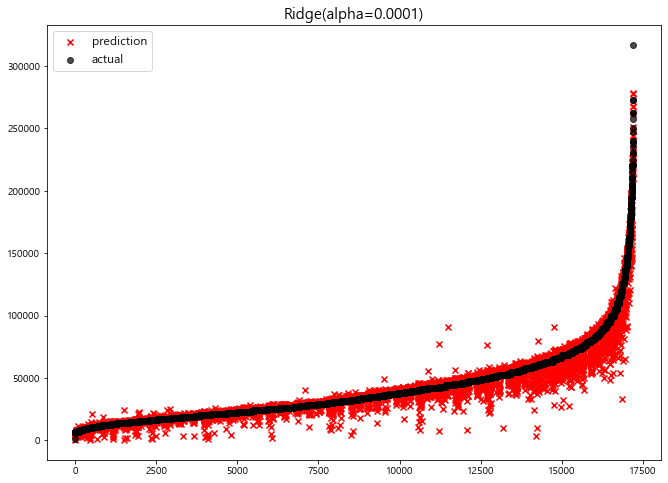

                       model        r2
0           Lasso(alpha=0.1)  0.966835
1             Ridge(alpha=1)  0.966828
2            Ridge(alpha=10)  0.966828
3           Ridge(alpha=0.1)  0.966813
4          Lasso(alpha=0.01)  0.966812
5          Ridge(alpha=0.01)  0.966809
6         Lasso(alpha=0.001)  0.966809
7        Lasso(alpha=0.0001)  0.966808
8         Ridge(alpha=0.001)  0.966808
9        Ridge(alpha=0.0001)  0.966808
10          Ridge(alpha=100)  0.966797
11            Lasso(alpha=1)  0.966796
12           Lasso(alpha=10)  0.966576
13          Lasso(alpha=100)  0.966474
14  data_adjust_Linear_model -0.000225
15             tree_r2_score -0.000225


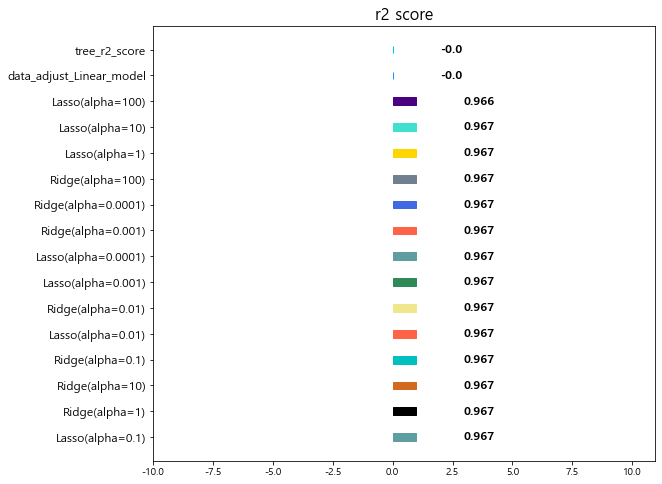

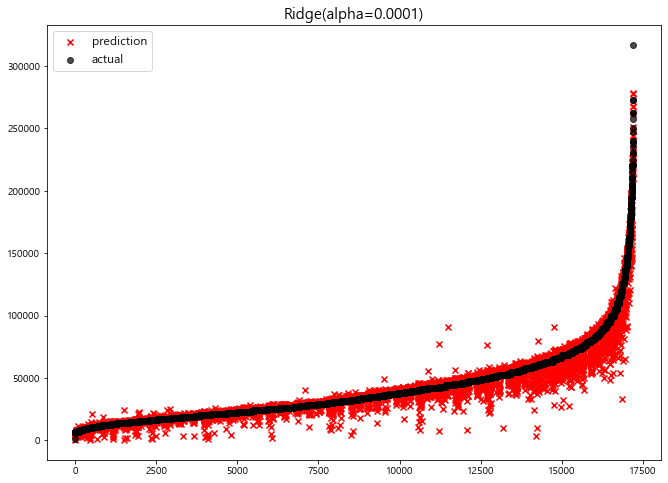

                       model            mae
0   data_adjust_Linear_model  302860.208506
1             tree_mae_score  302860.208506
2        Ridge(alpha=0.0001)    2362.708828
3         Ridge(alpha=0.001)    2362.705715
4        Lasso(alpha=0.0001)    2362.690599
5          Ridge(alpha=0.01)    2362.674763
6         Lasso(alpha=0.001)    2362.614543
7           Ridge(alpha=0.1)    2362.383360
8          Lasso(alpha=0.01)    2361.818824
9             Ridge(alpha=1)    2360.498142
10          Lasso(alpha=0.1)    2356.298590
11           Ridge(alpha=10)    2355.236034
12          Ridge(alpha=100)    2341.799222
13            Lasso(alpha=1)    2340.818828
14          Lasso(alpha=100)    2340.731010
15           Lasso(alpha=10)    2333.227053


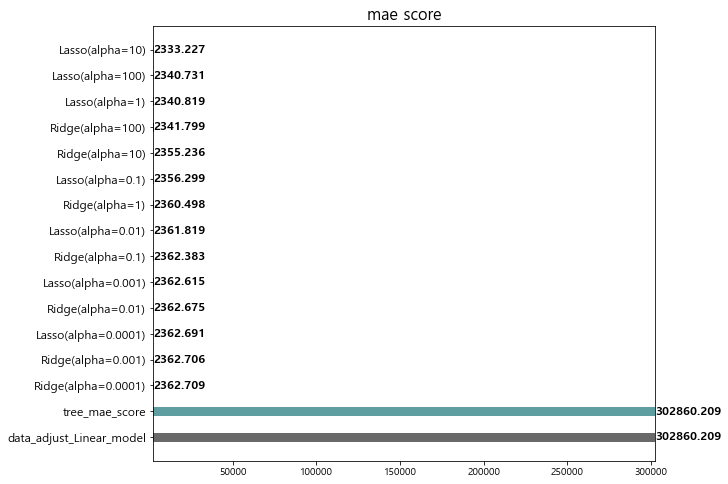

In [197]:
from sklearn.linear_model import Ridge

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### model의 계수 확인

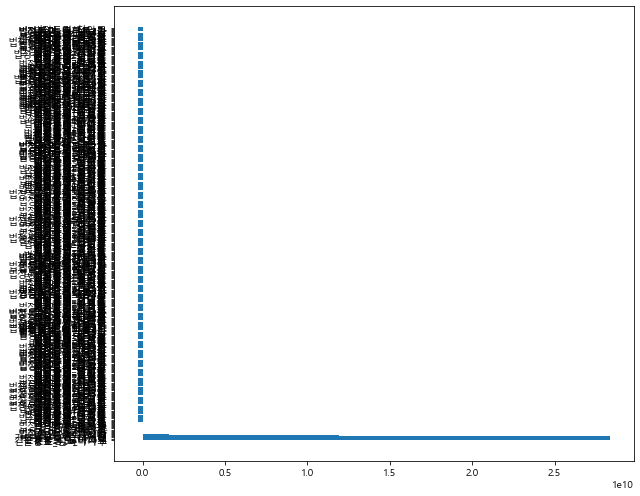

In [198]:
plot_coef(x_train.columns, model.coef_)

### 5. ElasticNet 모델 사용

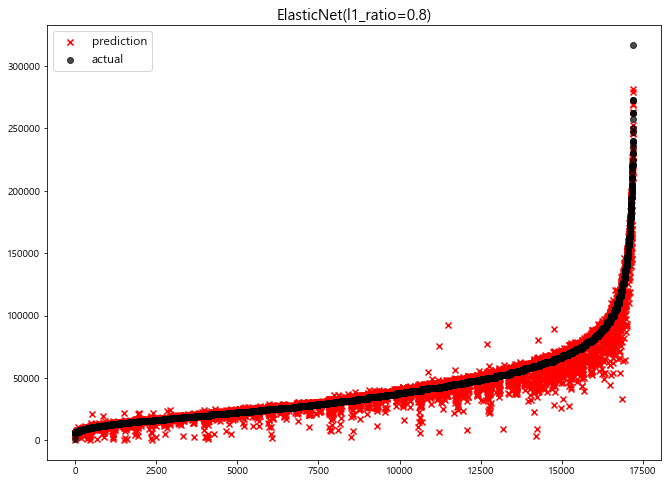

                       model           mse
0   data_adjust_Linear_model  3.850485e+14
1                   tree_mse  3.850485e+14
2           Lasso(alpha=100)  2.554250e+07
3   ElasticNet(l1_ratio=0.2)  2.549467e+07
4   ElasticNet(l1_ratio=0.5)  2.547743e+07
5            Lasso(alpha=10)  2.546842e+07
6   ElasticNet(l1_ratio=0.8)  2.543101e+07
7        Ridge(alpha=0.0001)  2.533678e+07
8         Ridge(alpha=0.001)  2.533674e+07
9        Lasso(alpha=0.0001)  2.533668e+07
10        Lasso(alpha=0.001)  2.533645e+07
11         Ridge(alpha=0.01)  2.533635e+07
12         Lasso(alpha=0.01)  2.533333e+07
13          Ridge(alpha=0.1)  2.533287e+07
14            Lasso(alpha=1)  2.532430e+07
15          Ridge(alpha=100)  2.532270e+07
16            Ridge(alpha=1)  2.531989e+07
17           Ridge(alpha=10)  2.531512e+07
18          Lasso(alpha=0.1)  2.531160e+07


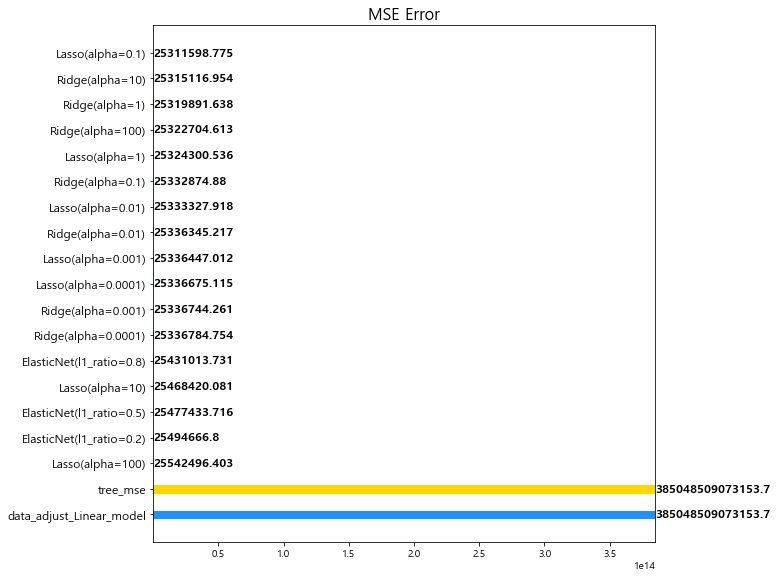

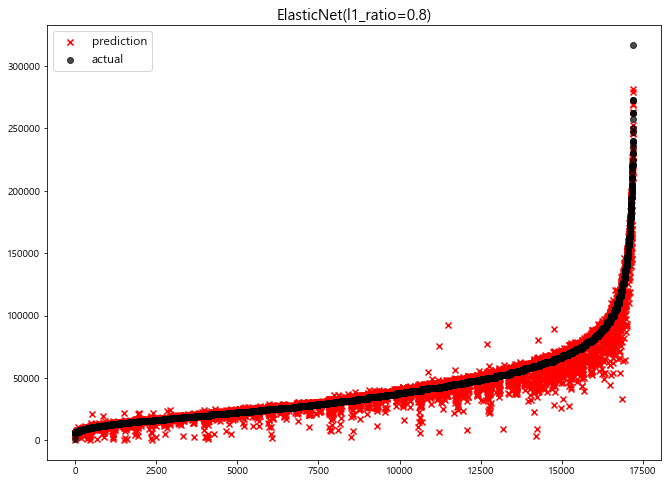

                       model        r2
0           Lasso(alpha=0.1)  0.966835
1             Ridge(alpha=1)  0.966828
2            Ridge(alpha=10)  0.966828
3           Ridge(alpha=0.1)  0.966813
4          Lasso(alpha=0.01)  0.966812
5          Ridge(alpha=0.01)  0.966809
6         Lasso(alpha=0.001)  0.966809
7        Lasso(alpha=0.0001)  0.966808
8         Ridge(alpha=0.001)  0.966808
9        Ridge(alpha=0.0001)  0.966808
10          Ridge(alpha=100)  0.966797
11            Lasso(alpha=1)  0.966796
12  ElasticNet(l1_ratio=0.8)  0.966629
13           Lasso(alpha=10)  0.966576
14  ElasticNet(l1_ratio=0.5)  0.966564
15  ElasticNet(l1_ratio=0.2)  0.966540
16          Lasso(alpha=100)  0.966474
17  data_adjust_Linear_model -0.000225
18             tree_r2_score -0.000225


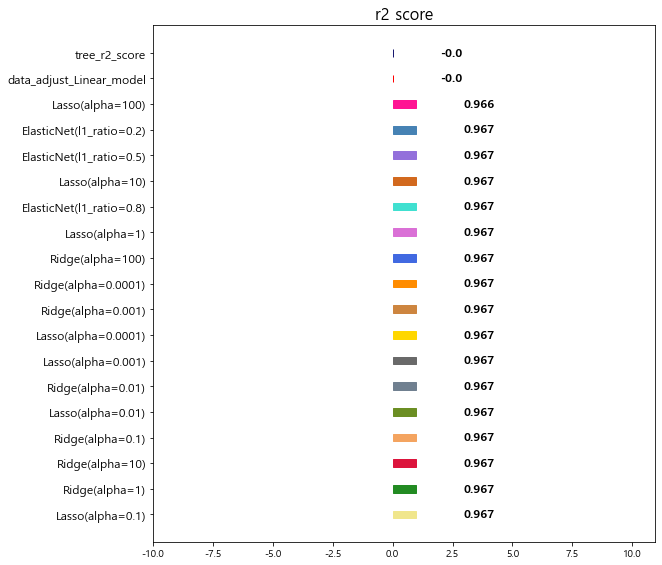

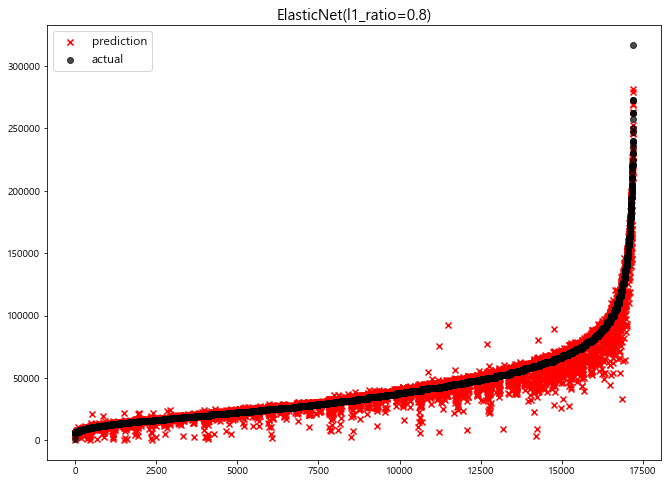

                       model            mae
0   data_adjust_Linear_model  302860.208506
1             tree_mae_score  302860.208506
2        Ridge(alpha=0.0001)    2362.708828
3         Ridge(alpha=0.001)    2362.705715
4        Lasso(alpha=0.0001)    2362.690599
5          Ridge(alpha=0.01)    2362.674763
6         Lasso(alpha=0.001)    2362.614543
7           Ridge(alpha=0.1)    2362.383360
8          Lasso(alpha=0.01)    2361.818824
9             Ridge(alpha=1)    2360.498142
10          Lasso(alpha=0.1)    2356.298590
11           Ridge(alpha=10)    2355.236034
12          Ridge(alpha=100)    2341.799222
13            Lasso(alpha=1)    2340.818828
14          Lasso(alpha=100)    2340.731010
15  ElasticNet(l1_ratio=0.2)    2334.241815
16  ElasticNet(l1_ratio=0.5)    2333.261334
17           Lasso(alpha=10)    2333.227053
18  ElasticNet(l1_ratio=0.8)    2332.336883


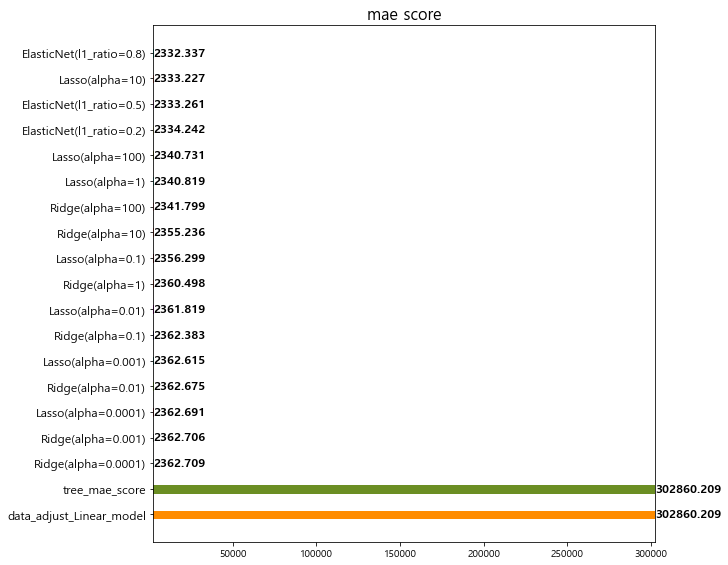

In [199]:
from sklearn.linear_model import ElasticNet

# 이번에는 alpha값을 고정시키겠다.
alpha = 0.1

#l1_ratio값을 다르게 하면서 모델의 하이브리드 성능을 예측, 관찰

ratios = [0.2, 0.5, 0.8]
#ratios = [0.2]

for ratio in ratios:   
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_r2_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_mae_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

## 파이프라인 (pipeline)
- Scaler 적용

In [200]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

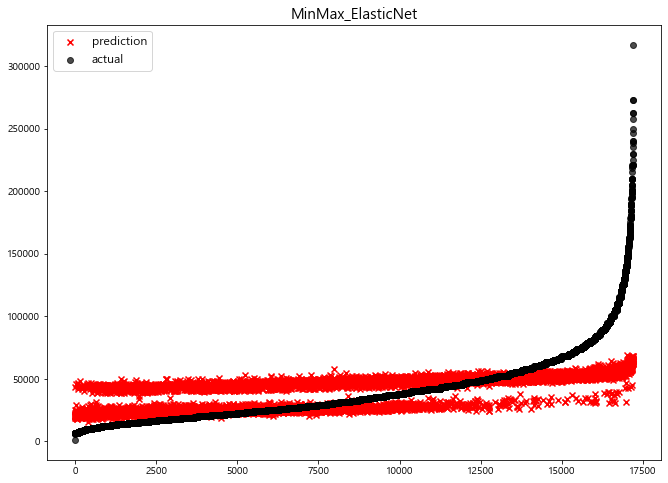

                       model           mse
0   data_adjust_Linear_model  3.850485e+14
1                   tree_mse  3.850485e+14
2          MinMax_ElasticNet  4.566553e+08
3           Lasso(alpha=100)  2.554250e+07
4   ElasticNet(l1_ratio=0.2)  2.549467e+07
5   ElasticNet(l1_ratio=0.5)  2.547743e+07
6            Lasso(alpha=10)  2.546842e+07
7   ElasticNet(l1_ratio=0.8)  2.543101e+07
8        Ridge(alpha=0.0001)  2.533678e+07
9         Ridge(alpha=0.001)  2.533674e+07
10       Lasso(alpha=0.0001)  2.533668e+07
11        Lasso(alpha=0.001)  2.533645e+07
12         Ridge(alpha=0.01)  2.533635e+07
13         Lasso(alpha=0.01)  2.533333e+07
14          Ridge(alpha=0.1)  2.533287e+07
15            Lasso(alpha=1)  2.532430e+07
16          Ridge(alpha=100)  2.532270e+07
17            Ridge(alpha=1)  2.531989e+07
18           Ridge(alpha=10)  2.531512e+07
19          Lasso(alpha=0.1)  2.531160e+07


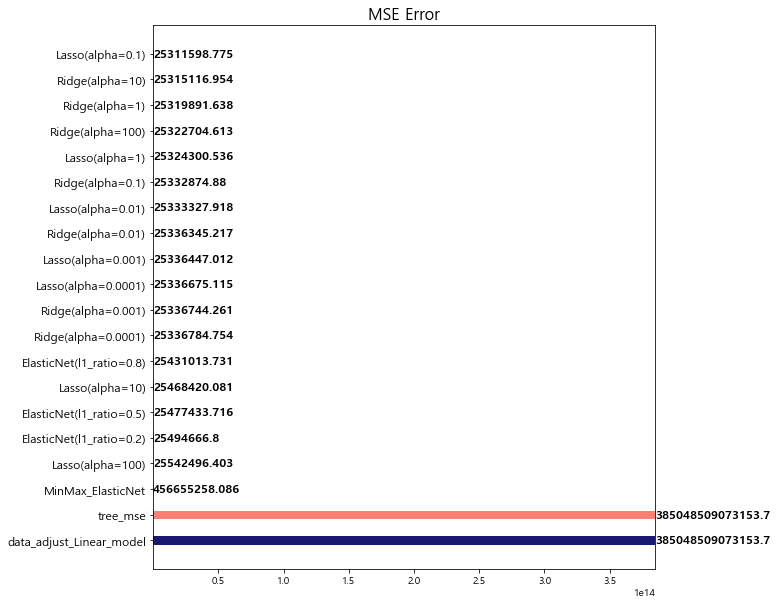

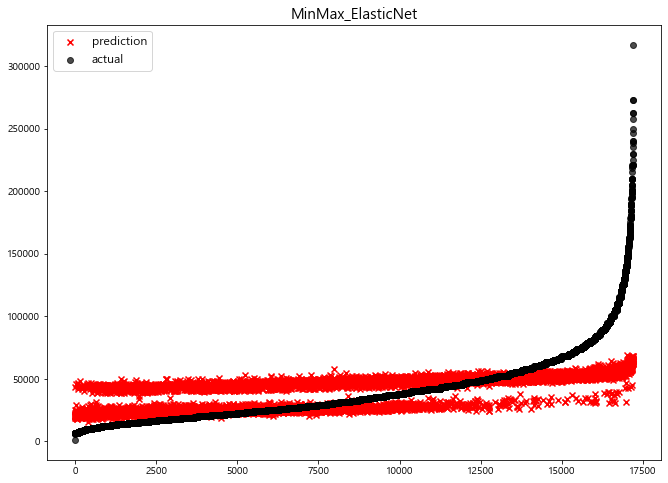

                       model        r2
0           Lasso(alpha=0.1)  0.966835
1             Ridge(alpha=1)  0.966828
2            Ridge(alpha=10)  0.966828
3           Ridge(alpha=0.1)  0.966813
4          Lasso(alpha=0.01)  0.966812
5          Ridge(alpha=0.01)  0.966809
6         Lasso(alpha=0.001)  0.966809
7        Lasso(alpha=0.0001)  0.966808
8         Ridge(alpha=0.001)  0.966808
9        Ridge(alpha=0.0001)  0.966808
10          Ridge(alpha=100)  0.966797
11            Lasso(alpha=1)  0.966796
12  ElasticNet(l1_ratio=0.8)  0.966629
13           Lasso(alpha=10)  0.966576
14  ElasticNet(l1_ratio=0.5)  0.966564
15  ElasticNet(l1_ratio=0.2)  0.966540
16          Lasso(alpha=100)  0.966474
17  data_adjust_Linear_model -0.000225
18             tree_r2_score -0.000225
19         MinMax_ElasticNet -1.894048


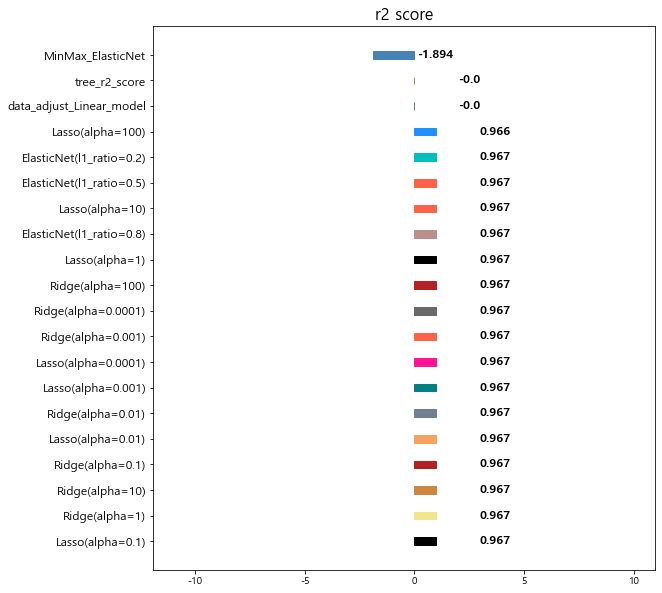

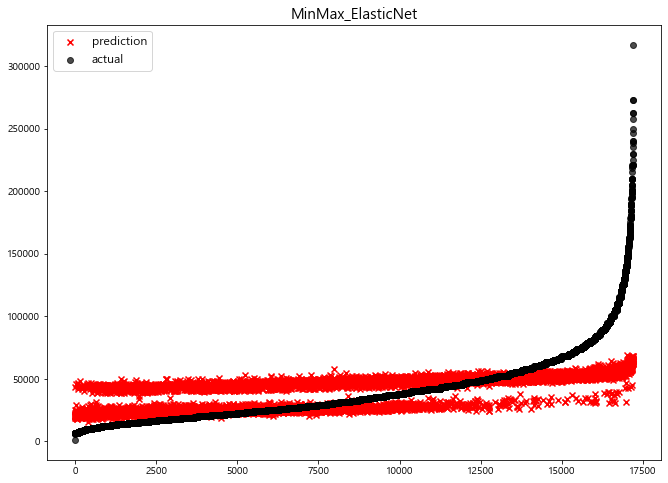

                       model            mae
0   data_adjust_Linear_model  302860.208506
1             tree_mae_score  302860.208506
2          MinMax_ElasticNet   13525.700723
3        Ridge(alpha=0.0001)    2362.708828
4         Ridge(alpha=0.001)    2362.705715
5        Lasso(alpha=0.0001)    2362.690599
6          Ridge(alpha=0.01)    2362.674763
7         Lasso(alpha=0.001)    2362.614543
8           Ridge(alpha=0.1)    2362.383360
9          Lasso(alpha=0.01)    2361.818824
10            Ridge(alpha=1)    2360.498142
11          Lasso(alpha=0.1)    2356.298590
12           Ridge(alpha=10)    2355.236034
13          Ridge(alpha=100)    2341.799222
14            Lasso(alpha=1)    2340.818828
15          Lasso(alpha=100)    2340.731010
16  ElasticNet(l1_ratio=0.2)    2334.241815
17  ElasticNet(l1_ratio=0.5)    2333.261334
18           Lasso(alpha=10)    2333.227053
19  ElasticNet(l1_ratio=0.8)    2332.336883


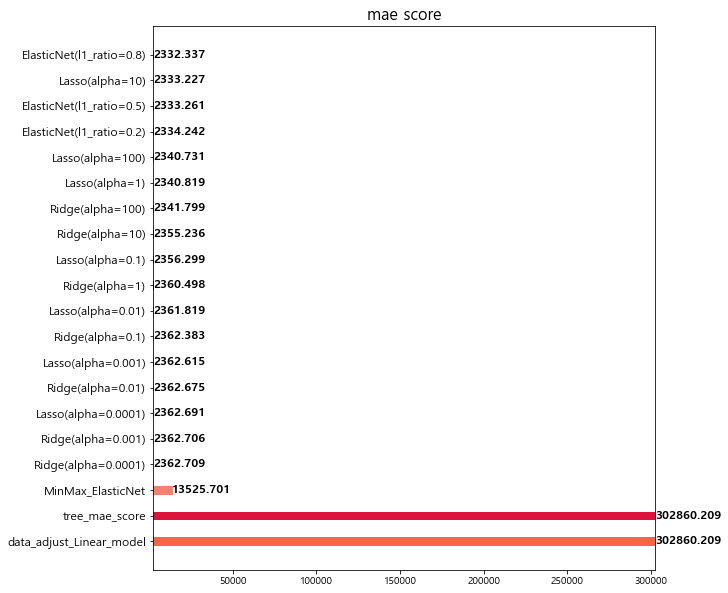

In [201]:
elastic_pipeline = make_pipeline(
   MinMaxScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2),
)
elastic_pipeline.fit(x_train, y_train)
elastic_pipeline_pred = elastic_pipeline.predict(x_test)
add_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_r2_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_mae_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

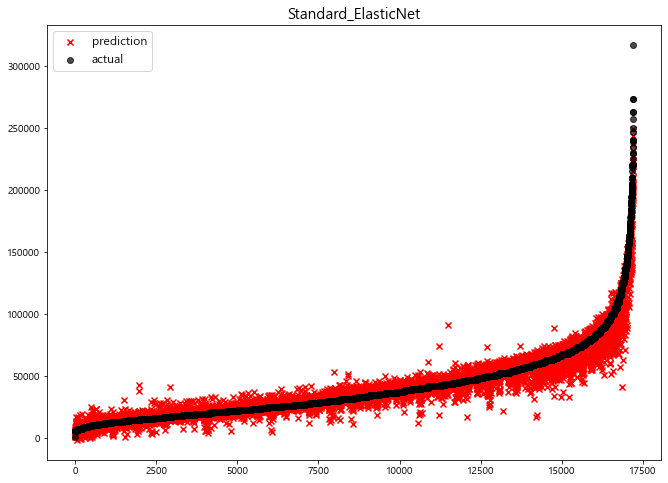

                       model           mse
0   data_adjust_Linear_model  3.850485e+14
1                   tree_mse  3.850485e+14
2          MinMax_ElasticNet  4.566553e+08
3        Standard_ElasticNet  3.305680e+07
4           Lasso(alpha=100)  2.554250e+07
5   ElasticNet(l1_ratio=0.2)  2.549467e+07
6   ElasticNet(l1_ratio=0.5)  2.547743e+07
7            Lasso(alpha=10)  2.546842e+07
8   ElasticNet(l1_ratio=0.8)  2.543101e+07
9        Ridge(alpha=0.0001)  2.533678e+07
10        Ridge(alpha=0.001)  2.533674e+07
11       Lasso(alpha=0.0001)  2.533668e+07
12        Lasso(alpha=0.001)  2.533645e+07
13         Ridge(alpha=0.01)  2.533635e+07
14         Lasso(alpha=0.01)  2.533333e+07
15          Ridge(alpha=0.1)  2.533287e+07
16            Lasso(alpha=1)  2.532430e+07
17          Ridge(alpha=100)  2.532270e+07
18            Ridge(alpha=1)  2.531989e+07
19           Ridge(alpha=10)  2.531512e+07
20          Lasso(alpha=0.1)  2.531160e+07


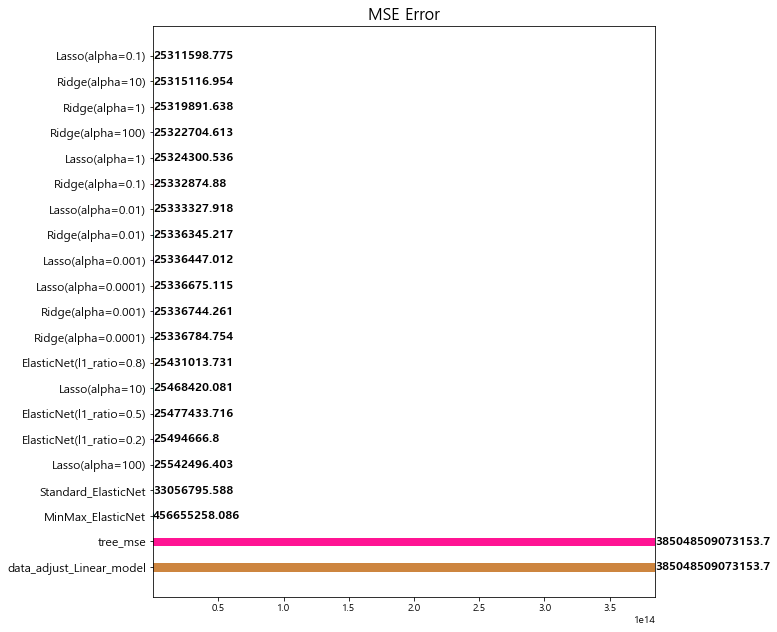

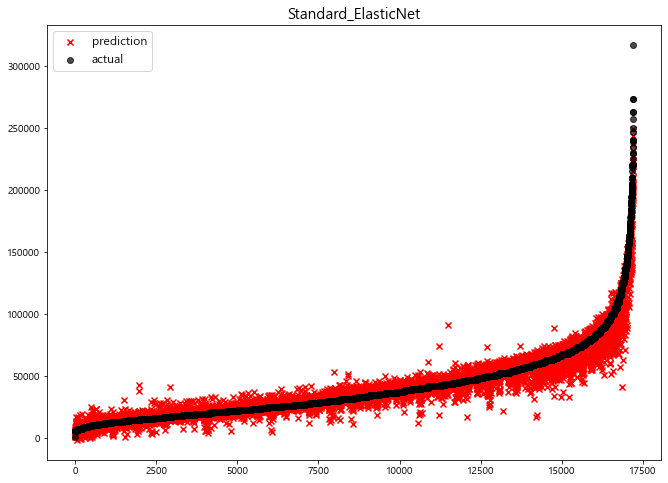

                       model        r2
0           Lasso(alpha=0.1)  0.966835
1             Ridge(alpha=1)  0.966828
2            Ridge(alpha=10)  0.966828
3           Ridge(alpha=0.1)  0.966813
4          Lasso(alpha=0.01)  0.966812
5          Ridge(alpha=0.01)  0.966809
6         Lasso(alpha=0.001)  0.966809
7        Lasso(alpha=0.0001)  0.966808
8         Ridge(alpha=0.001)  0.966808
9        Ridge(alpha=0.0001)  0.966808
10          Ridge(alpha=100)  0.966797
11            Lasso(alpha=1)  0.966796
12  ElasticNet(l1_ratio=0.8)  0.966629
13           Lasso(alpha=10)  0.966576
14  ElasticNet(l1_ratio=0.5)  0.966564
15  ElasticNet(l1_ratio=0.2)  0.966540
16          Lasso(alpha=100)  0.966474
17       Standard_ElasticNet  0.951937
18  data_adjust_Linear_model -0.000225
19             tree_r2_score -0.000225
20         MinMax_ElasticNet -1.894048


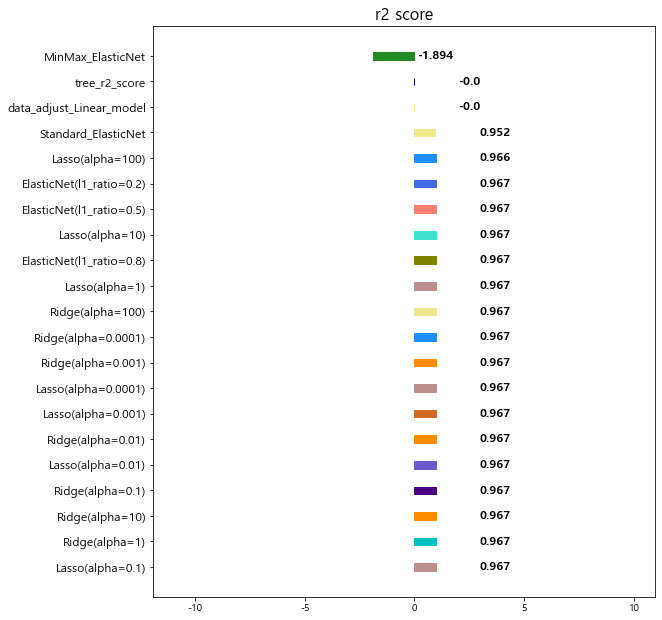

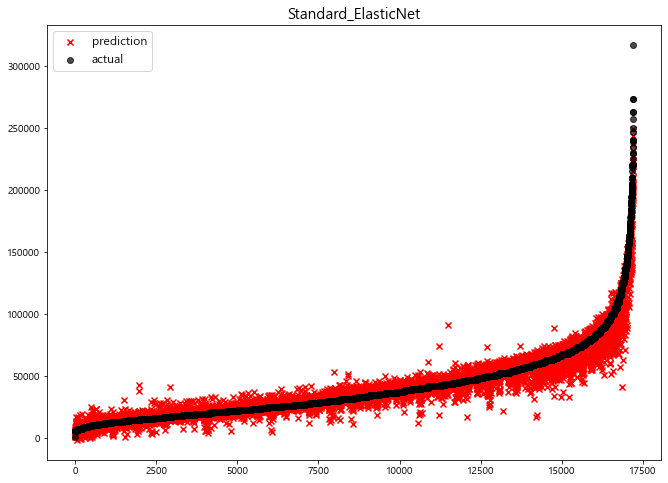

                       model            mae
0   data_adjust_Linear_model  302860.208506
1             tree_mae_score  302860.208506
2          MinMax_ElasticNet   13525.700723
3        Standard_ElasticNet    3136.348964
4        Ridge(alpha=0.0001)    2362.708828
5         Ridge(alpha=0.001)    2362.705715
6        Lasso(alpha=0.0001)    2362.690599
7          Ridge(alpha=0.01)    2362.674763
8         Lasso(alpha=0.001)    2362.614543
9           Ridge(alpha=0.1)    2362.383360
10         Lasso(alpha=0.01)    2361.818824
11            Ridge(alpha=1)    2360.498142
12          Lasso(alpha=0.1)    2356.298590
13           Ridge(alpha=10)    2355.236034
14          Ridge(alpha=100)    2341.799222
15            Lasso(alpha=1)    2340.818828
16          Lasso(alpha=100)    2340.731010
17  ElasticNet(l1_ratio=0.2)    2334.241815
18  ElasticNet(l1_ratio=0.5)    2333.261334
19           Lasso(alpha=10)    2333.227053
20  ElasticNet(l1_ratio=0.8)    2332.336883


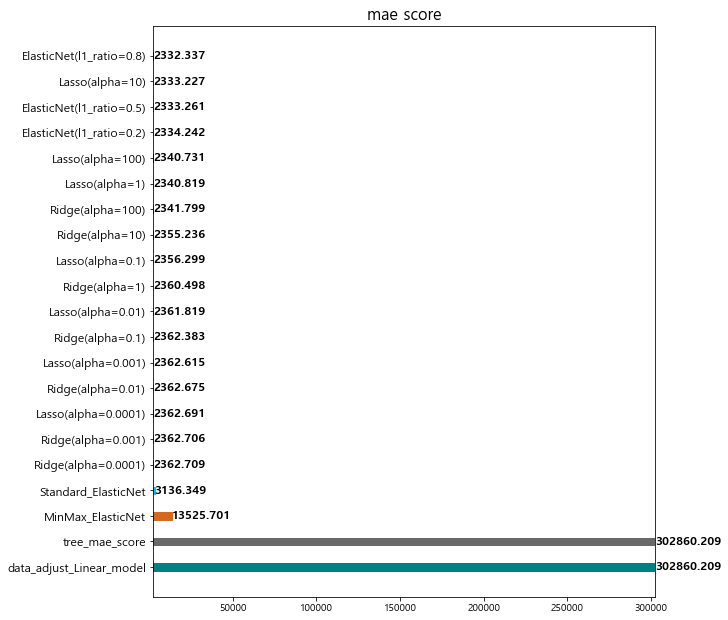

In [202]:
pipeline = make_pipeline(
   StandardScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2)
)
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)
add_model('Standard_ElasticNet', pipeline_pred, y_test)
add_r2_model('Standard_ElasticNet', pipeline_pred, y_test)
add_mae_model('Standard_ElasticNet', pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 6. PolynomialFeature 추가 모델

In [203]:
from sklearn.preprocessing import PolynomialFeatures

In [204]:
poly_pipeline = make_pipeline(
    # StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2),
)
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)
add_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_r2_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_mae_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

MemoryError: Unable to allocate 26.4 GiB for an array with shape (51588, 68634) and data type float64